In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from tbparse import SummaryReader
log_dir = "/wclustre/nova/users/rafaelma/main/tb_logs"
reader = SummaryReader(log_dir, extra_columns={'dir_name','wall_time'},pivot=True)
df = reader.scalars
#df["wall_clock"] = pd.to_datetime(df.wall_time, unit="s")

print(df)

        step epoch  train_loss_epoch  train_loss_step  val_loss_epoch  \
0          0   NaN               NaN              NaN             NaN   
1          1   NaN               NaN              NaN             NaN   
2          2   NaN               NaN              NaN             NaN   
3          3   NaN               NaN              NaN             NaN   
4          4   NaN               NaN              NaN             NaN   
...      ...   ...               ...              ...             ...   
34040  18749  15.0               NaN        12.167384             NaN   
34041  18799  15.0               NaN        11.805265             NaN   
34042  18849  15.0               NaN        13.033713             NaN   
34043  18899  15.0               NaN        12.388091             NaN   
34044  18949  15.0               NaN        11.756308             NaN   

       val_loss_step                                 wall_time  \
0          18.816530                         1698364913.0

In [8]:
df.to_csv("tb_logs.csv")

In [7]:
df["wall_clock"] = pd.to_datetime(df.wall_time, unit="s")


ValueError: unit='s' not valid with non-numerical val='[1698363546.9354315, 1698363546.9355445, 1698364951.6068017]', at position 49

In [3]:
df=pd.read_csv('tb_logs.csv')[['train_loss_epoch','val_loss_epoch','dir_name']].drop_duplicates()
df['dir_name'] = df['dir_name'].str.split('/').str[0]
df=df[df['dir_name'] !='borrar']
df=df[df['dir_name'] !='Mask2FormerNova_tunedv3']

df=df.dropna()
df=df.reset_index()

In [23]:
dir_names

array(['Mask2FormerNova_tuned', 'Mask2FormerNova_tunedv2',
       'Mask2FormerNova_tunedv2_ag', 'Mask2FormerNova_tunedv3'],
      dtype=object)

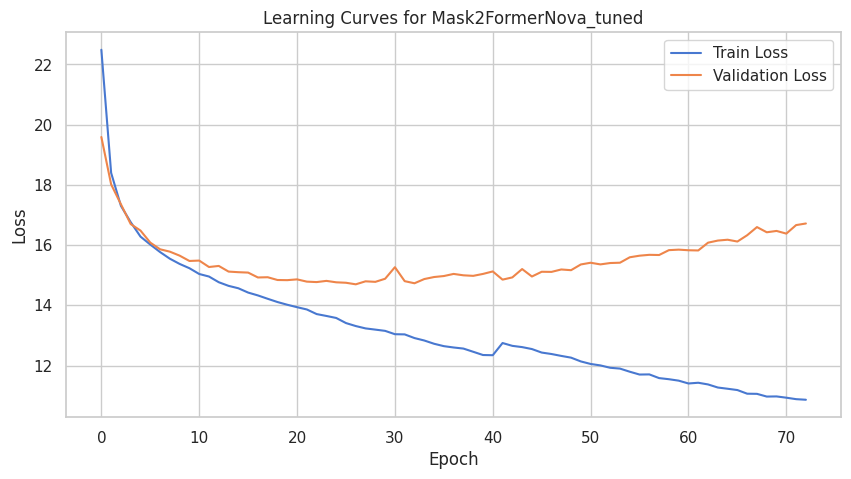

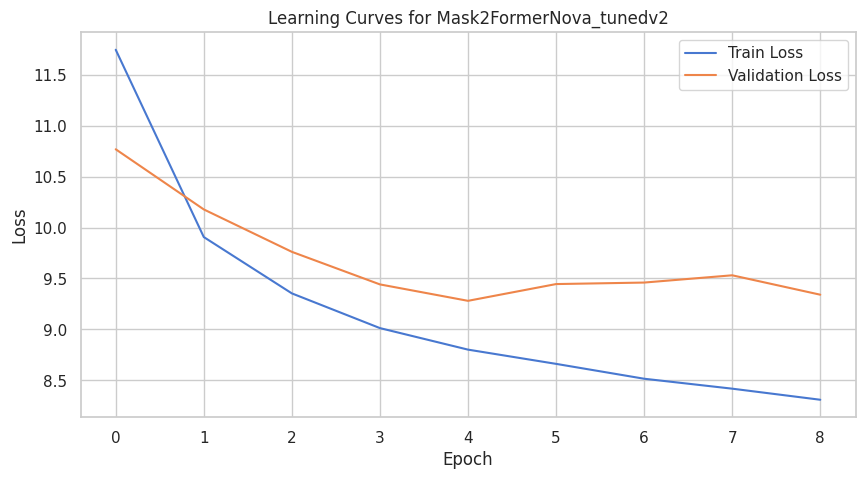

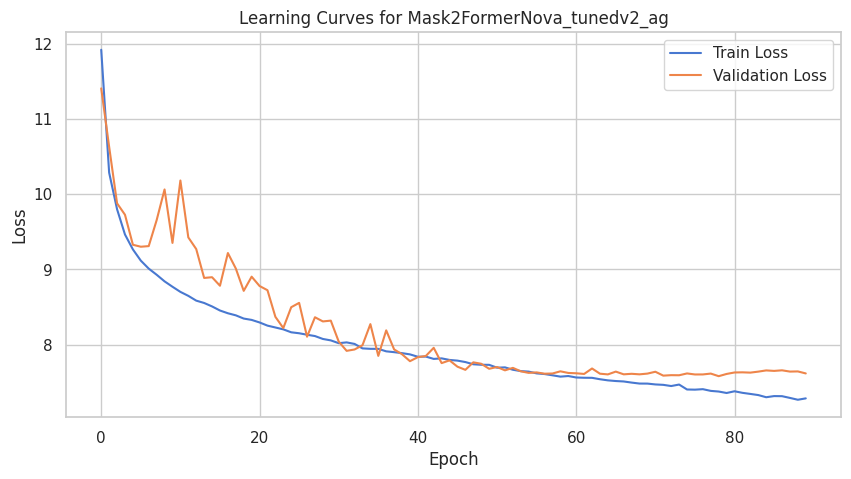

In [4]:
# Obtener los nombres únicos en dir_name
dir_names = df['dir_name'].unique()

# Graficar las curvas de aprendizaje
for dir_name in dir_names:
    df_filtered = df[df['dir_name'] == dir_name].reset_index()
    
    plt.figure(figsize=(10, 5))
    plt.plot(df_filtered['train_loss_epoch'], label='Train Loss')
    plt.plot(df_filtered['val_loss_epoch'], label='Validation Loss')
    plt.title(f'Learning Curves for {dir_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

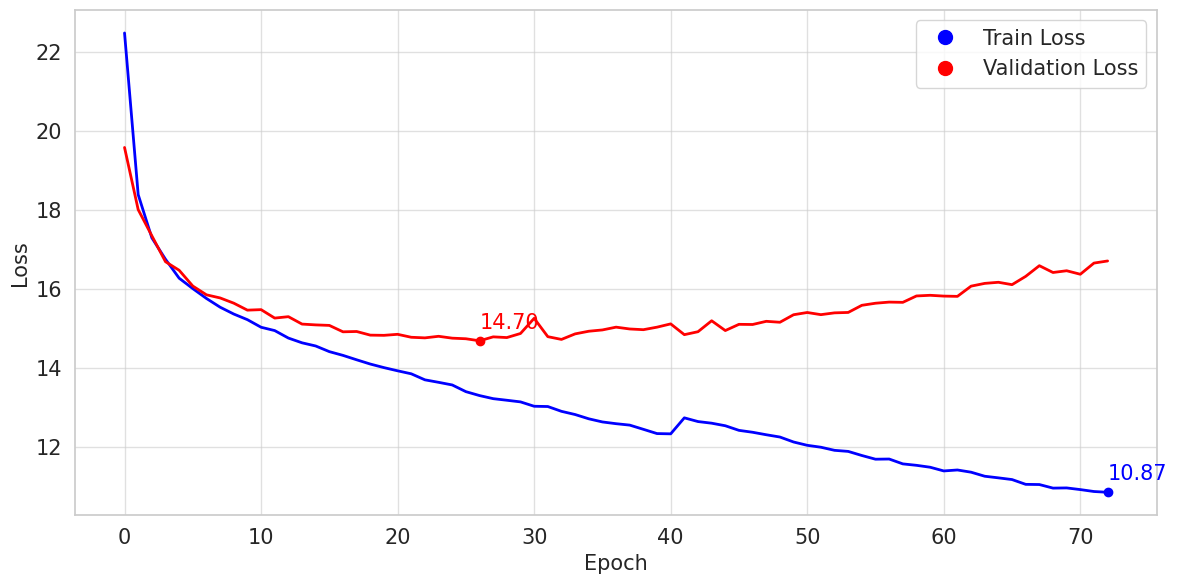

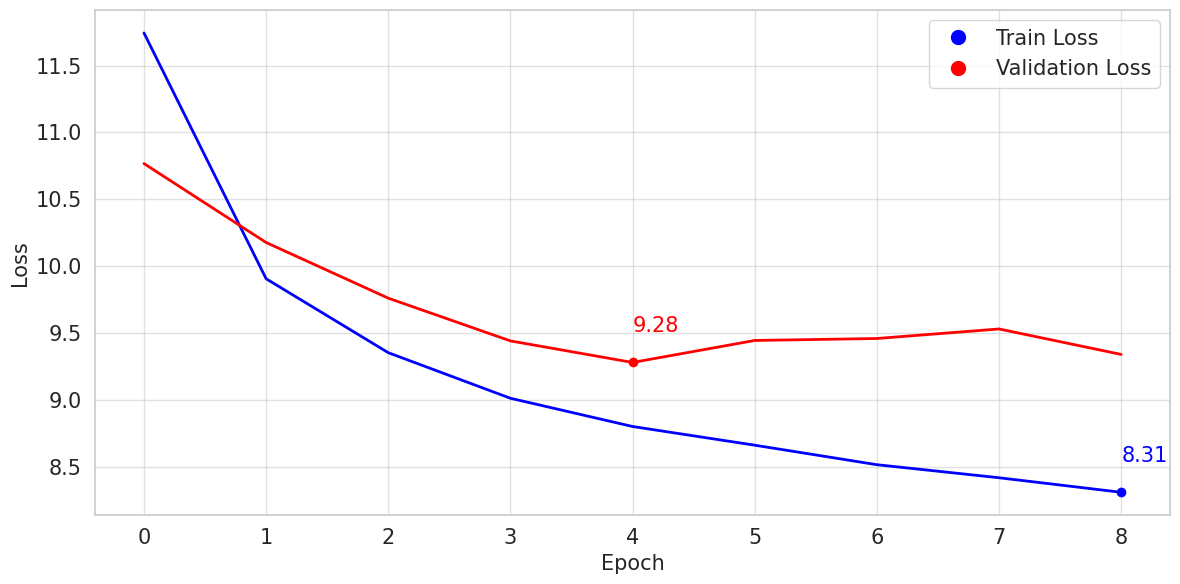

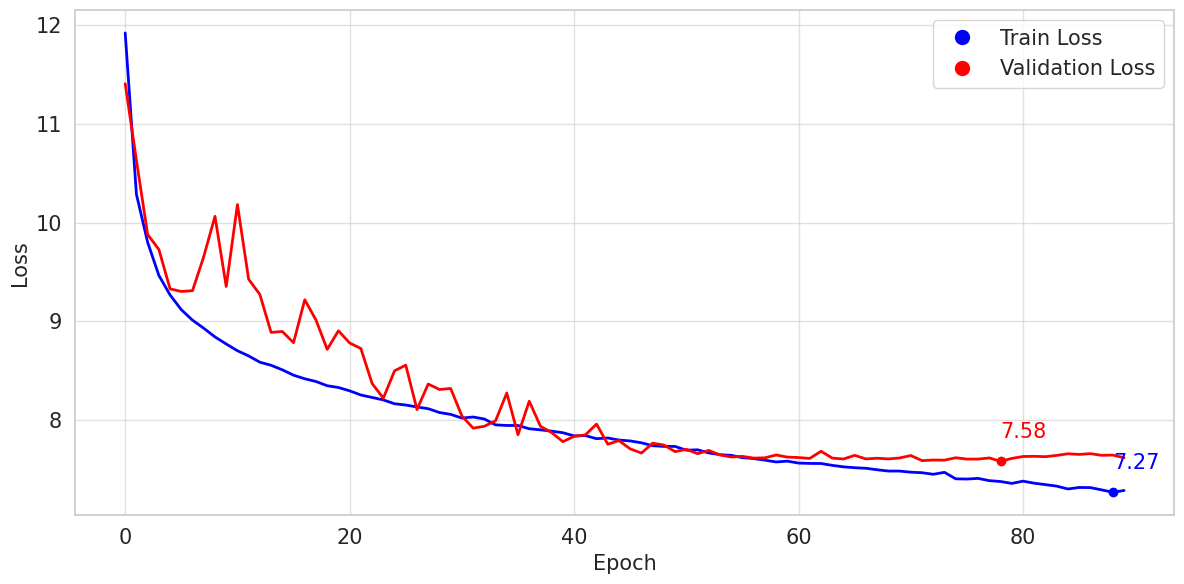

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Configuración del estilo
sns.set(style="whitegrid", palette="muted")

for dir_name in dir_names:
    df_filtered = df[df['dir_name'] == dir_name].reset_index()
    
    plt.figure(figsize=(12, 6))
    
    # Graficar curvas de pérdida
    train_loss = df_filtered['train_loss_epoch']
    val_loss = df_filtered['val_loss_epoch']
    
    # Graficar con colores específicos
    plt.plot(train_loss, color='blue', linewidth=2)
    plt.plot(val_loss, color='red', linewidth=2)
    
    # Anotar el mínimo de la pérdida de validación
    min_val_loss_idx = val_loss.idxmin()
    min_val_loss = val_loss.min()
    plt.scatter(min_val_loss_idx, min_val_loss, color='red', zorder=5)
    plt.text(min_val_loss_idx, min_val_loss+0.2, f'{min_val_loss:.2f}', 
             fontsize=15, verticalalignment='bottom', color='red')
    
    # Anotar el mínimo de la pérdida de entrenamiento
    min_train_loss_idx = train_loss.idxmin()
    min_train_loss = train_loss.min()
    plt.scatter(min_train_loss_idx, min_train_loss, color='blue', zorder=5)
    plt.text(min_train_loss_idx, min_train_loss+0.2, f'{min_train_loss:.2f}', 
             fontsize=15, verticalalignment='bottom', color='blue')
    
    #plt.title(f'Learning Curves for {dir_name}', fontsize=16)
    plt.xlabel('Epoch', fontsize=15)
    plt.ylabel('Loss', fontsize=15)

    # Cambiar el tamaño de fuente de los números en los ejes x e y
    plt.tick_params(axis='x', labelsize=15)  # Tamaño de fuente de los números del eje x
    plt.tick_params(axis='y', labelsize=15)  # Tamaño de fuente de los números del eje y


    # Personalizar la leyenda para mostrar los símbolos como círculos
    legend_elements = [Line2D([0], [0], color='blue', lw=0, marker='o', markersize=10, label='Train Loss'),
                       Line2D([0], [0], color='red', lw=0, marker='o', markersize=10, label='Validation Loss')]
    
    plt.legend(handles=legend_elements, fontsize=15, loc='best')
    plt.grid(True, linestyle='-', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f'{dir_name}.jpg')
    plt.show()
